<a href="https://colab.research.google.com/github/jacob7123/TensorFlow/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we are going to learn how to write neural networks for classification problem.

A classification is where you try to classifysomething as one thing or another.

A few types of classification problem:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

#create circles
X, y = make_circles(n_samples,
           noise=0.03,
           random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... Let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0" : X[:, 0], "X1" : X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


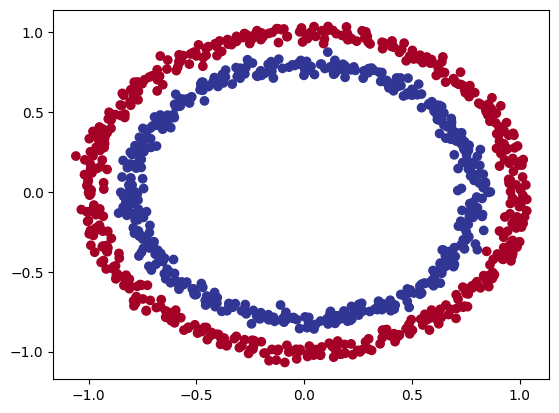

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Imput and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we are working
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...


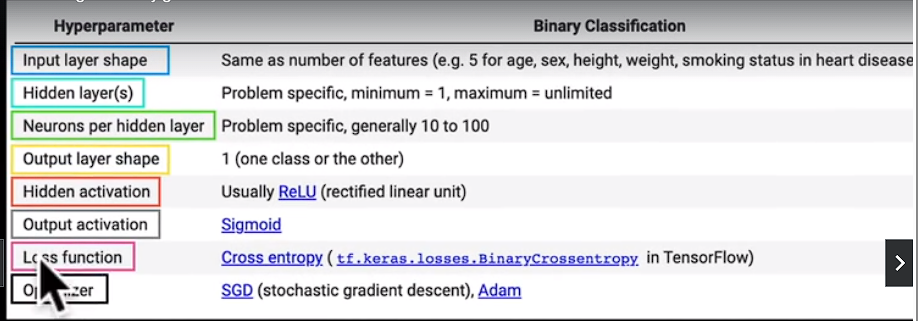

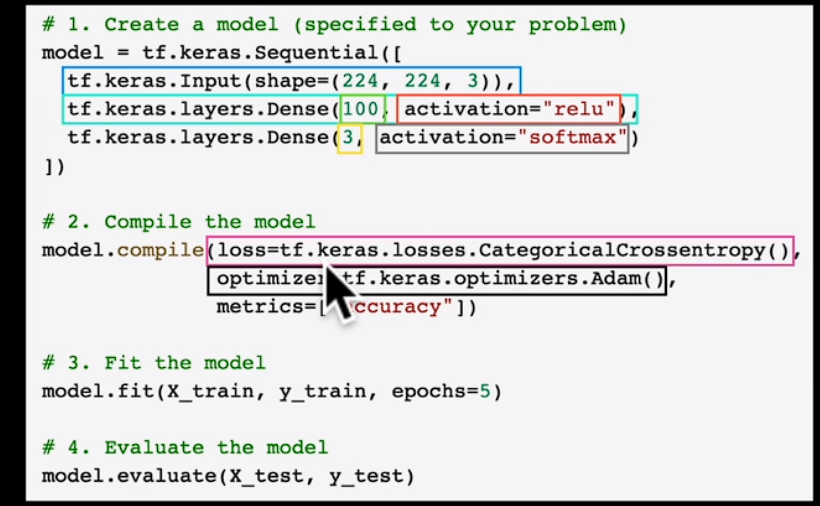

In [9]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [10]:
# Set the random_seed
tf.random.set_seed(42)

# 1. Create the model using the Sequentail API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
        optimizer = tf.keras.optimizers.SGD(),
        metrics = ["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs = 5)

Epoch 1/5
32/32 [==============================] - 3s 8ms/step - loss: 3.7396 - accuracy: 0.4670
Epoch 2/5
32/32 [==============================] - 0s 7ms/step - loss: 1.1032 - accuracy: 0.4940
Epoch 3/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7190 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 8ms/step - loss: 0.7016 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 8ms/step - loss: 0.6969 - accuracy: 0.4890


In [11]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 1s 8ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a binary classification problem and our model is getting around ~50% accuracy... it is performing as if is is guessing.

So let's step things up a notch and add an extra layer.


In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.SGD(),
        metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.693254828453064, 0.5]

In [14]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can inprove our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layers.
2. Compiling a model - here we might to choose a different optimization function such as Adam insteat of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs(leave it training for longer).

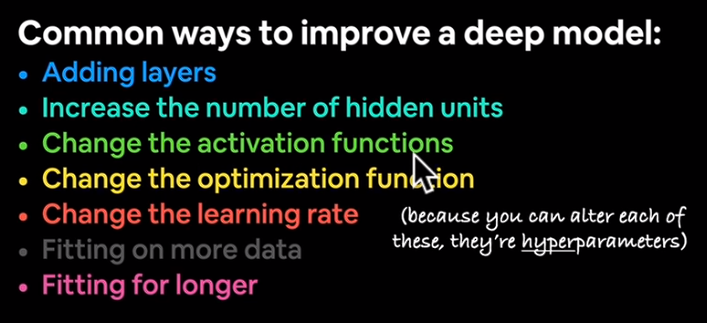

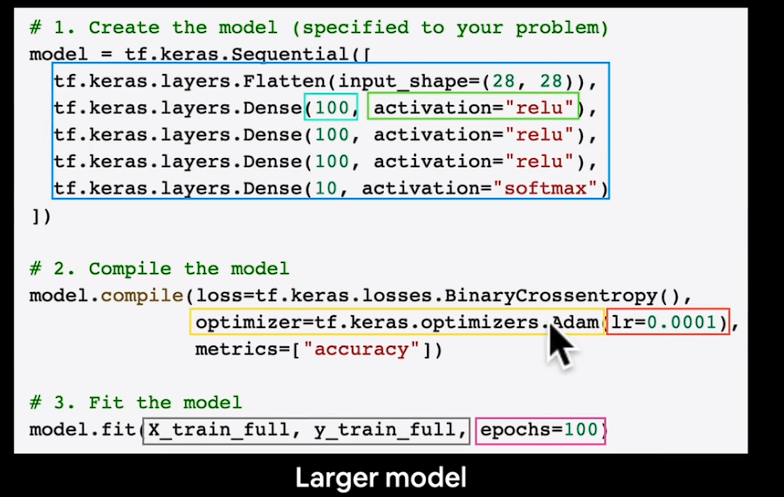

In [15]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model(this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dens neurons, and 100 is hidden units
  tf.keras.layers.Dense(10), # add another layer with 10 neurous
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 1s 2ms/step - loss: 0.6962 - accuracy: 0.5130


[0.6962265968322754, 0.5130000114440918]

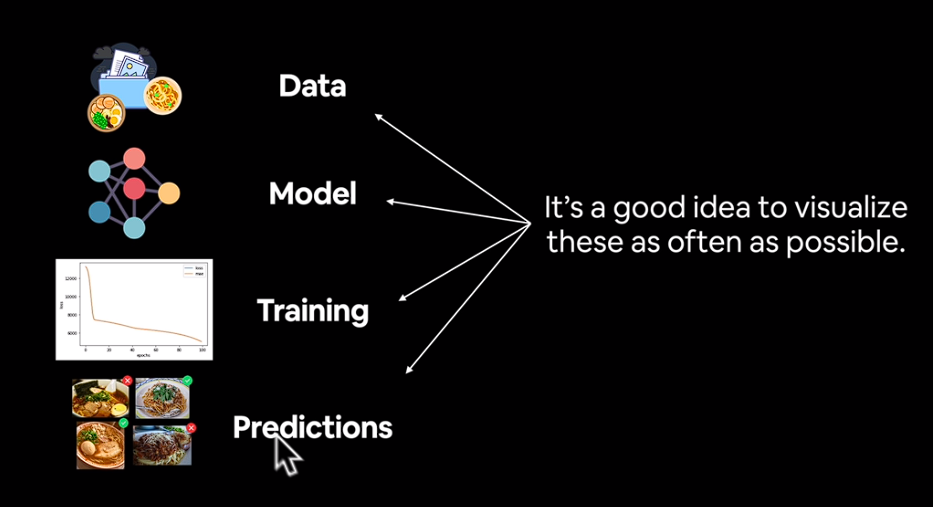

To visulize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and label (Y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prections as well as a line between zones(where each unique class falls)

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
              np.linspace(y_min, y_max, 100))

  # Create X value(we are going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multicalss classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


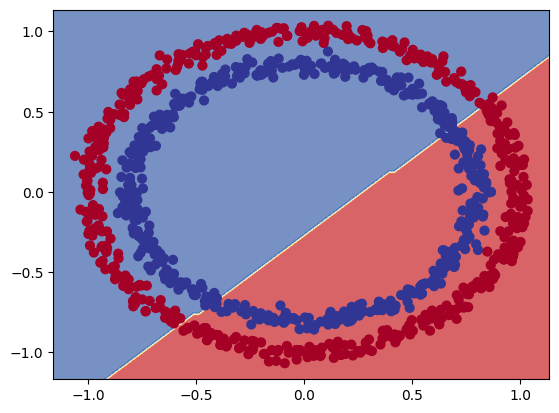

In [19]:
# Check out predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

In [20]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: ignored

oh wait... we compiled our model for a binary classification problem.

But... we are working on a regression problem, let's change the model to suit our data.

In [21]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model, this time with a regression-specific loss function
model_3.compile(loss=tf.keras.losses.mae,
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 473.3836 - mae: 473.3836
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 327.0056 - mae: 327.0056
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 185.5030 - mae: 185.5030
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 57.8122 - mae: 57.8122
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 86.7163 - mae: 86.7163
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 87.0875 - mae: 87.0875
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 48.4165 - mae: 48.4165
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 58.2196 - mae: 58.2196
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 47.8621 - mae: 47.8621
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 50.0217 - mae: 50.0217
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 7ms/step


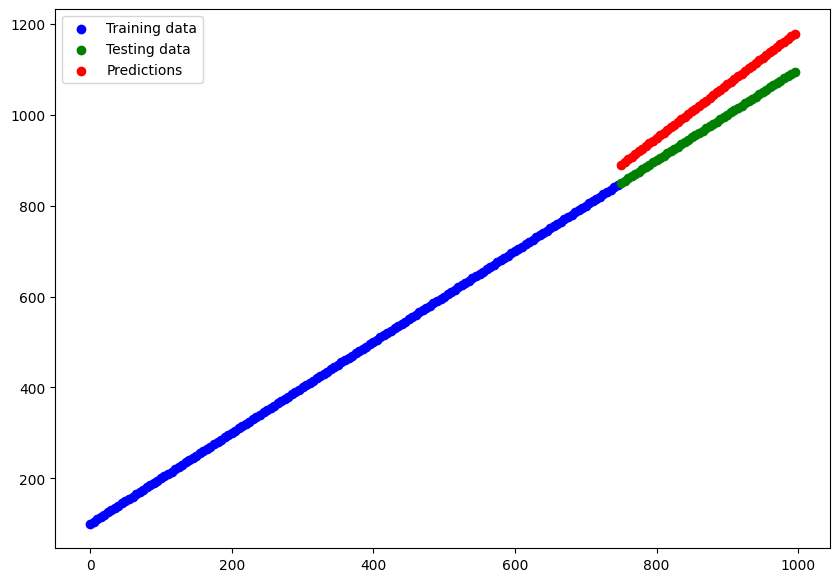

In [22]:
# Mak predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

### The missing piece: Non-linearity

In [23]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="linear")
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3535 - accuracy: 0.4690
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3213 - accuracy: 0.4690
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2812 - accuracy: 0.4700
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2239 - accuracy: 0.4680
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1805 - accuracy: 0.4680
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1554 - accuracy: 0.4720
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1417 - accuracy: 0.4710
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1081 - accuracy: 0.4710
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0969 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0916 - accuracy: 0.4700
Epoch 11/

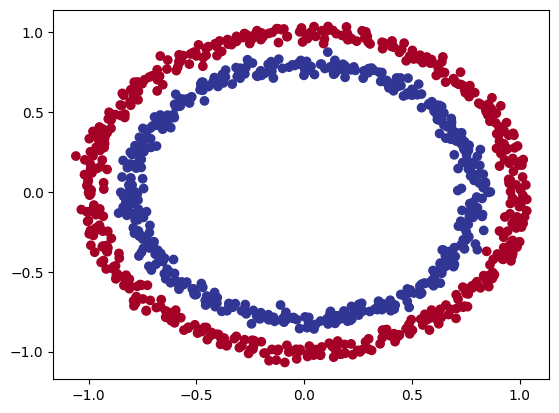

In [24]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


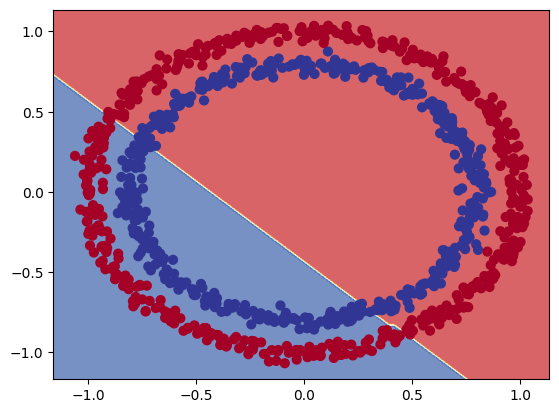

In [25]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
            X=X,
            y=y)

Let's try build our first neural network with a non-linear activation function.

In [26]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6062 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5803 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5198 - accuracy: 0.4780
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4839 - accuracy: 0.4810
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4798 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4787 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4615 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4130 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3996 - accuracy: 0.4790
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3955 - accuracy: 0.4780
Epoch 11/

In [27]:
# Time to replicate the multi-layer neural network from TensorFlow playground in code...

# Set the random seed
tf.random.set_seed(42)

# 1. Create a model(2 hidden layers and 4 neurons for each)
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 2.9904 - accuracy: 0.4560
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 2.7443 - accuracy: 0.4540
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 2.1755 - accuracy: 0.4640
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 1.9265 - accuracy: 0.4580
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 1.6655 - accuracy: 0.4600
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 1.4103 - accuracy: 0.4580
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 1.0435 - accuracy: 0.4620
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9814 - accuracy: 0.4530
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9533 - accuracy: 0.4430
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 0.9365 - accuracy: 0.4300
Epoch 11/

In [28]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8980


[0.2986522614955902, 0.8980000019073486]

313/313 [==============================] - 1s 2ms/step
doing binary classification


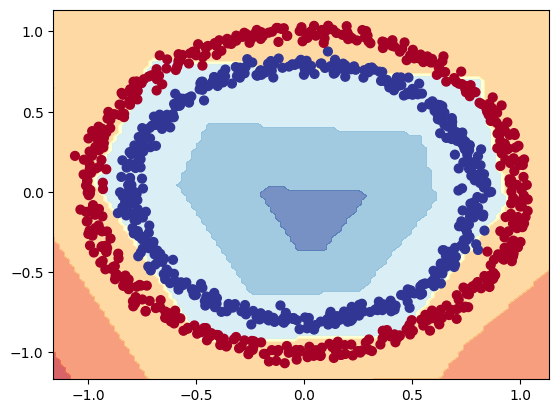

In [29]:
plot_decision_boundary(model=model_6,
            X=X,
            y=y)

In [30]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model(add output layer activation)
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7535 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7348 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7243 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.4260
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.3620
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.3680
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.3860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7063 - accuracy: 0.4010
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7051 - accuracy: 0.3570
Epoch 11/

In [31]:
# 4. Evaluate our latest model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.9330


[0.49982354044914246, 0.9330000281333923]

313/313 [==============================] - 0s 1ms/step
doing binary classification


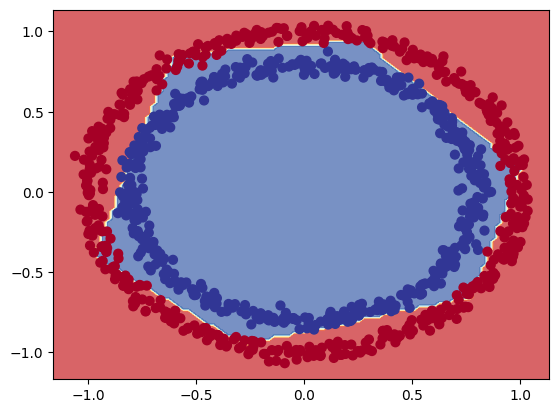

In [32]:
# Let's visualize our incredible metrics
plot_decision_boundary(model=model_7, X=X, y=y)

🤔 **Question:** What is wrong the predictions we have made? Are we really evaluating our model coorectly? Hint: what data did the model learn on and what data did we predict on?

🔑 **Note:** The combination of **linear (straight lines) and non-linear(non-straight line) functions** is one of the key fundamentals of neural networks.

Now we have discussed the concept of linear and non-linear functions(or lines), let's see them in action.


In [33]:
# Create a toy a tensor(similar tothe data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

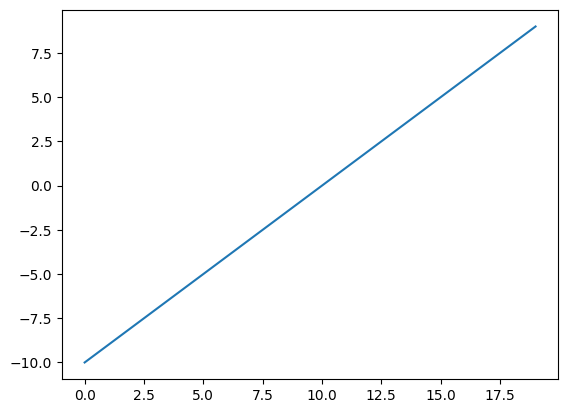

In [34]:
# Visualize our toy tensor
plt.plot(A)

In [35]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

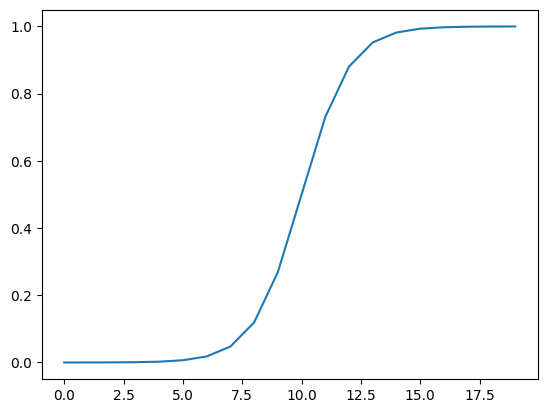

In [36]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [37]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(x, 0)

# Pass our toy tensor to our custom relu function
relu(A), A

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>)

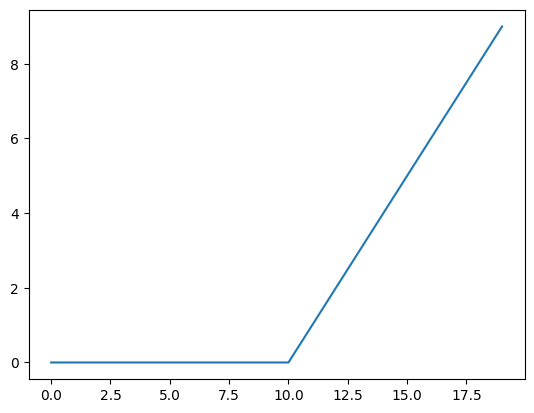

In [38]:
# Plot ReLu-modified tensor
plt.plot(relu(A))

In [39]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

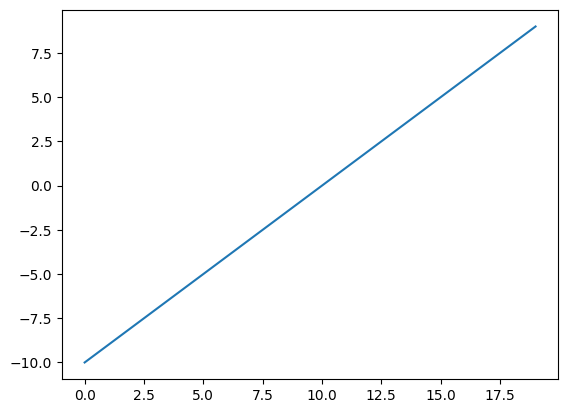

In [40]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [41]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

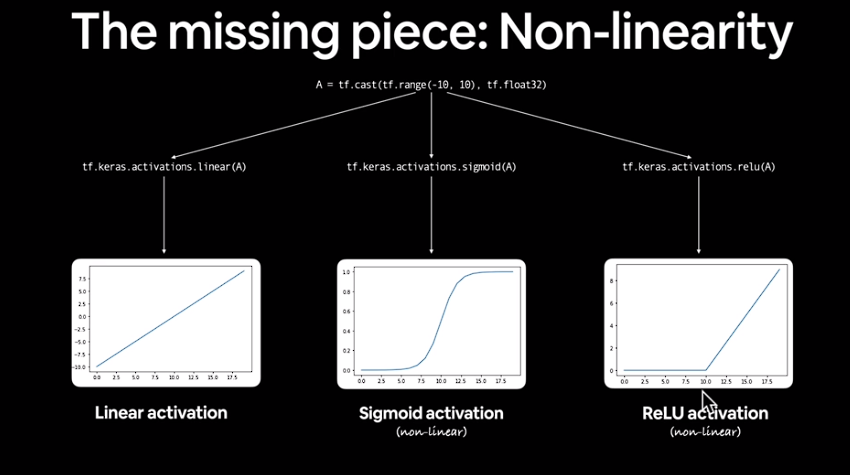

## Evaluating and improving our classification

So far we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.


In [42]:
# Check how many examples we have
len(X)

1000

In [43]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [44]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# 1. Create a model(same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
        metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 3ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5325
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5263
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6753 - accuracy: 0.5362
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6025
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6511 - accuracy: 0.5863
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6402 - accuracy: 0.6375
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6304 - accuracy: 0.6263
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6139 - accuracy: 0.6587
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5946 - accuracy: 0.6900
Epoch 11/25
25/25 [

In [45]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.8750


[0.34130859375, 0.875]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


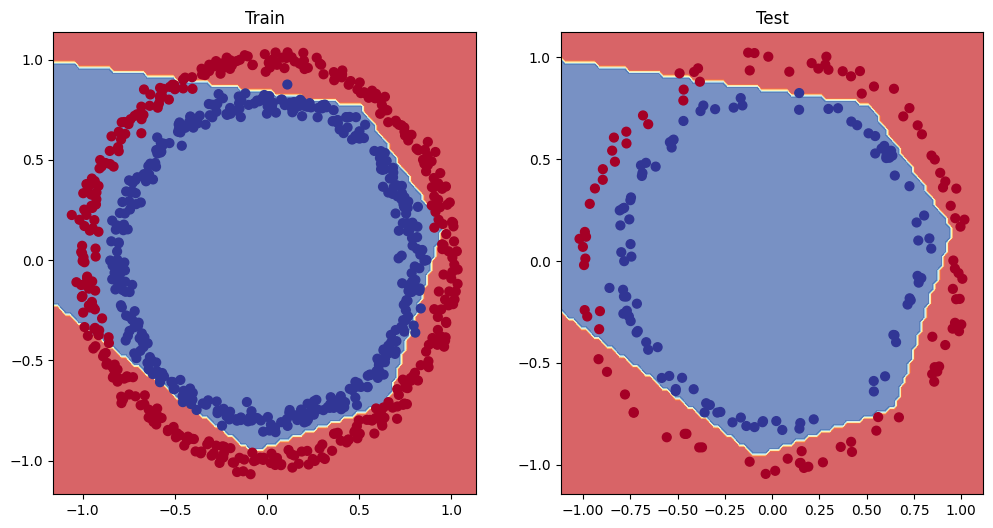

In [46]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss(or training) curves

In [47]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.692985,0.49625
1,0.686996,0.53250
2,0.681854,0.52625
3,0.675328,0.53625
4,0.661559,0.60250
5,0.651100,0.58625
6,0.640160,0.63750
7,0.630370,0.62625
8,0.613895,0.65875
9,0.594568,0.69000


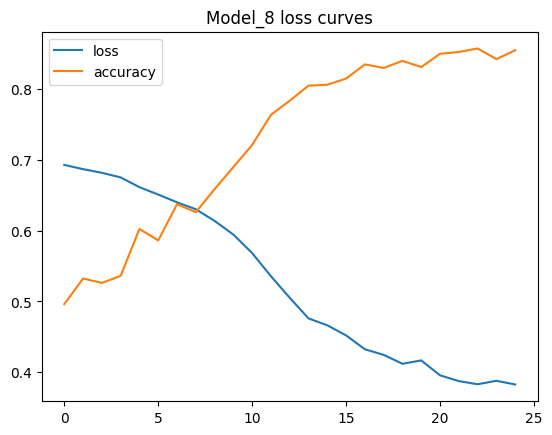

In [48]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

**Note:** For many problems, the loss function going down means the model is improving(the predictions it is making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate(the learning rate where the loss decresses the most during traning) we are going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your model *while* its training.
* Another model(we could use the same one as above, but we are practicing building models here)
* A modified loss curves plot.

In [49]:
# Set random seed
tf.random.set_seed(42)

# Create a model(same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
        optimizer="Adam",
        metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model(passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
             y_train,
             epochs=100,
             callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7033 - accuracy: 0.4938 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.4900 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4938 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7012 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6989 - accuracy: 0.4963 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

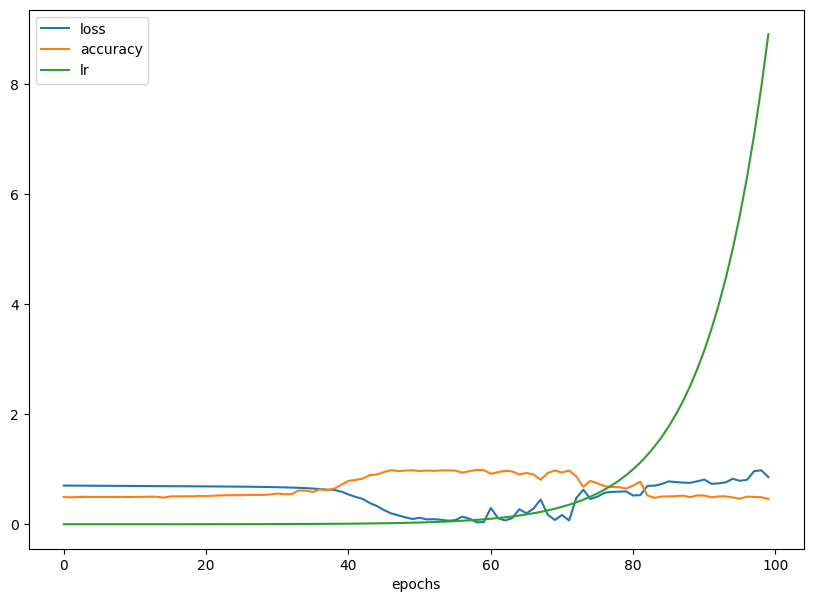

In [50]:
# Checkout history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs. Loss')

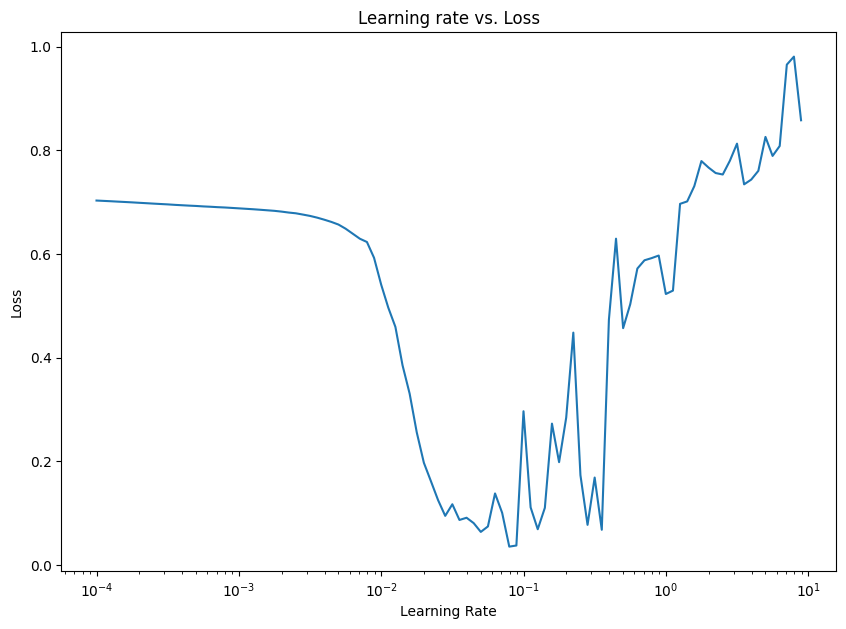

In [51]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100) / 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss")

**Example:**

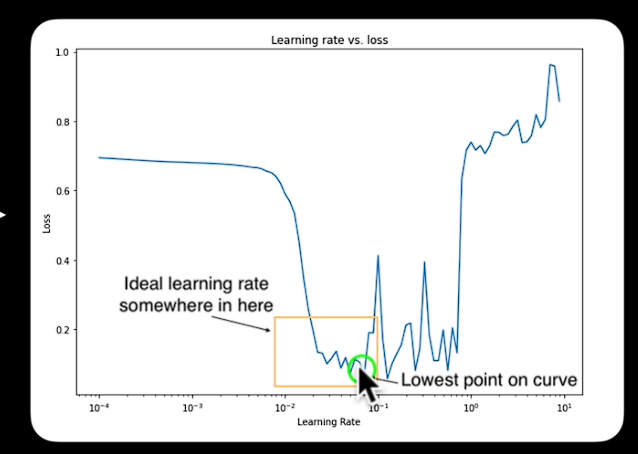

In [52]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-4, 1e-4

(1, 0.1, 0.01, 0.0001, 0.0001)

In [53]:
# Learning rate we used before(model_8)
10**-2

0.01

In [54]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create a model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
         optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
         metrics=["accuracy"])

# Fit the model for 20 epochs(5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.6896 - accuracy: 0.5300
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5663
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6639 - accuracy: 0.5850
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6441 - accuracy: 0.6300
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6030 - accuracy: 0.6888
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7875
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8425
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.9013
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.9362
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.9762
Epoch 11/20
25/25 [

In [55]:
# Evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9900


[0.037473876029253006, 0.9900000095367432]

In [56]:
# Evaluate model_8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3413 - accuracy: 0.8750


[0.34130859375, 0.875]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


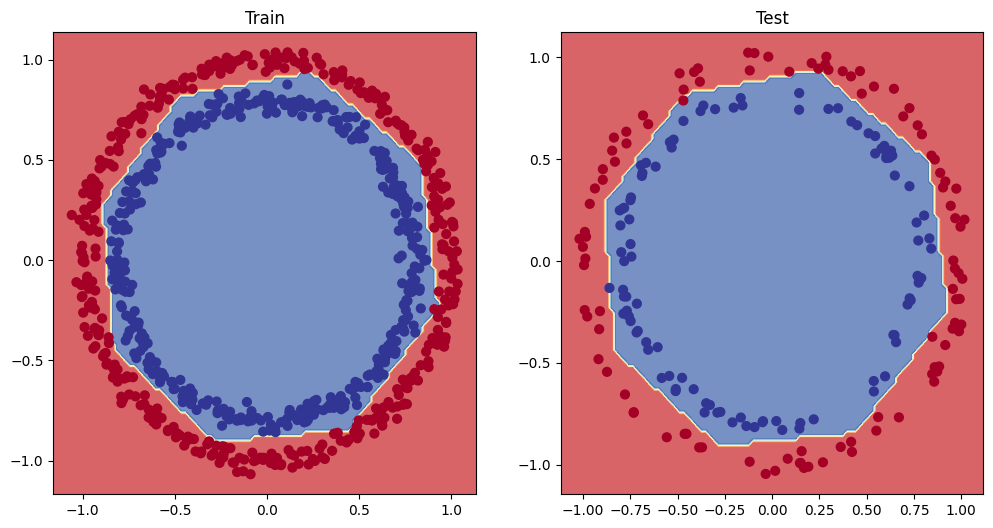

In [57]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_10, X=X_test, y=y_test)
plt.show();

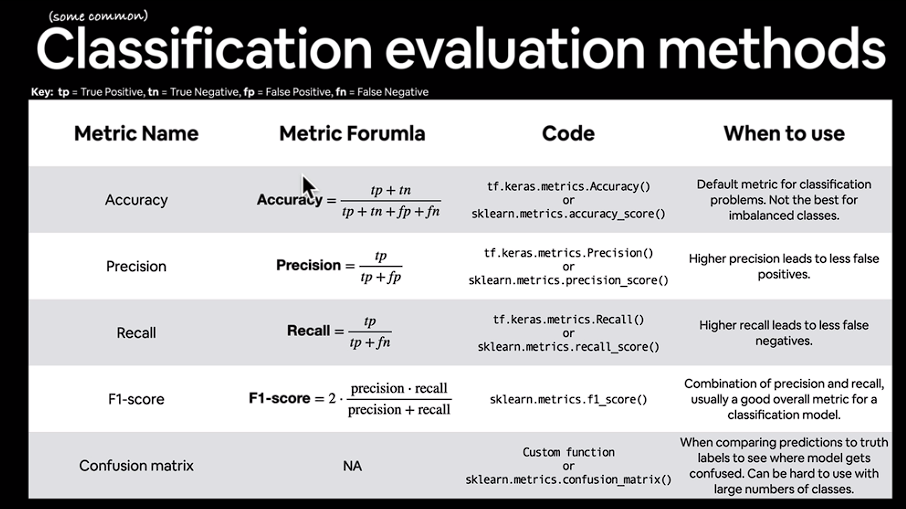

## More classification evaluation methods

Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification repret(from scikit-learn)

In [58]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9900
Model loss on the test set: 0.037473876029253006
Model accuracy on the test set: 99.00%


How about confusion matrix?

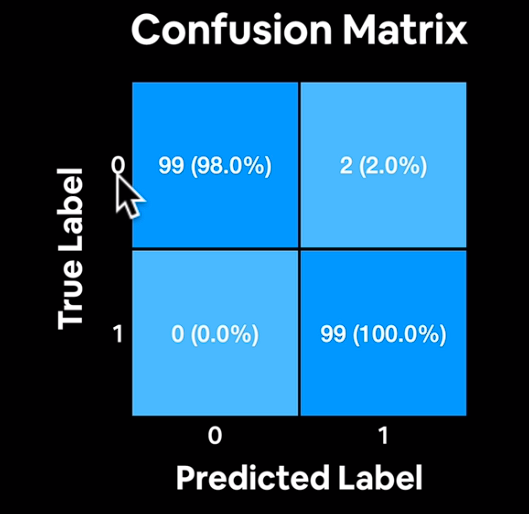

In [61]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [62]:
y_test[:10], y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[0.9921353 ],
        [0.9967295 ],
        [0.9807883 ],
        [0.99440277],
        [0.10187294],
        [0.00106672],
        [0.9075058 ],
        [0.00187   ],
        [0.99734163],
        [0.05099345]], dtype=float32))

Oops... looks like our predictions array has come out in **prediction probability** form... the standard output form the sigmoid(or softmax) activation functions.

In [65]:
# Convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [67]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  1,  98]])

How about we prettify our confusion matrix?

In [86]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools

def plot_confusion_matrix(y_test, y_preds):
  figsize = (10, 10)

  # Create the confusion matrix
  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Create classes
  classes = False
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="confusion Matrix",
      xlabel="Predicted Label",
      ylabel="True Label",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

  # Set x_axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(20)
  ax.xaxis.label.set_size(20)
  ax.title.set_size(20)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  # Plot the test on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
        size=15)

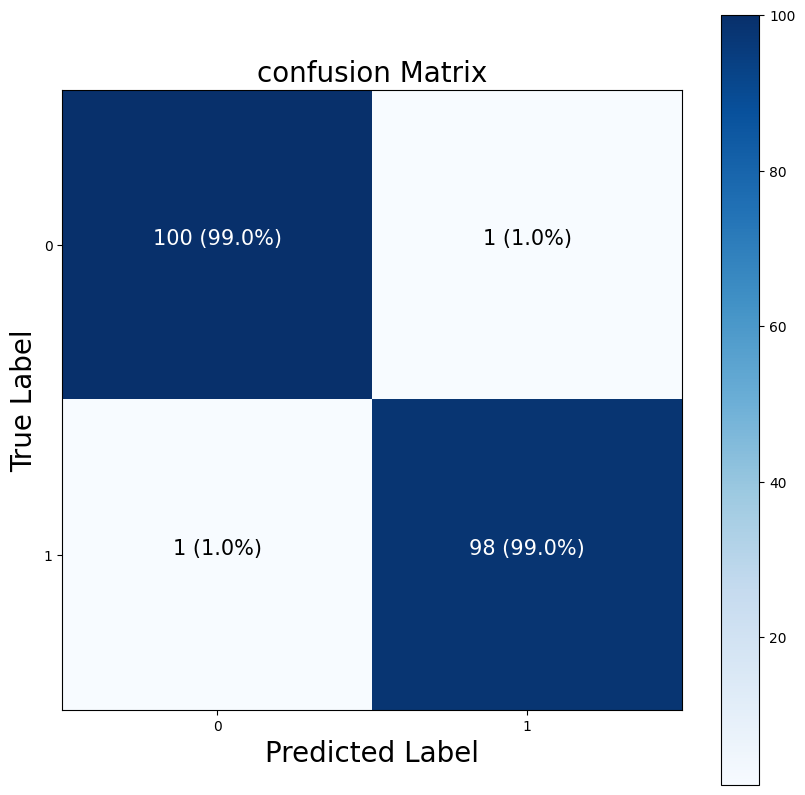

In [87]:
plot_confusion_matrix(y_test, y_preds)